In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/dannmota/RNA-And-Deep-Learning/refs/heads/main/Atividade01/Salary_dataset.csv')

In [27]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [28]:
df = df.rename(columns={'YearsExperience': 'AnosDeExperiencia', 'Salary': 'Salario'})

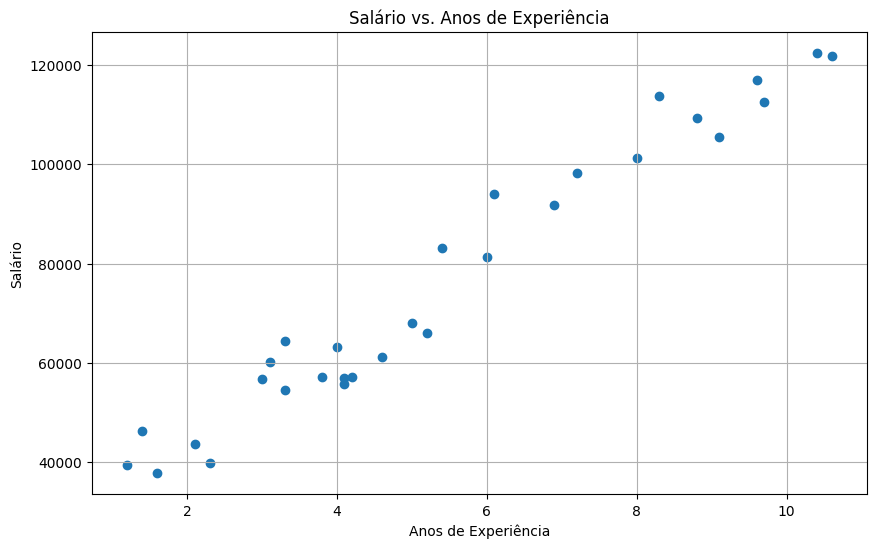

In [29]:
if 'df' in locals():
    plt.figure(figsize=(10, 6))
    plt.scatter(df['AnosDeExperiencia'], df['Salario'])
    plt.title('Salário vs. Anos de Experiência')
    plt.xlabel('Anos de Experiência')
    plt.ylabel('Salário')
    plt.grid(True)
    plt.show()
else:
    print("DataFrame 'df' não foi carregado. Pule esta célula.")

In [31]:
X = df[['AnosDeExperiencia']]
y = df['Salario']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamanho do conjunto de treino (X): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X): {X_test.shape}")

Tamanho do conjunto de treino (X): (24, 1)
Tamanho do conjunto de teste (X): (6, 1)


In [32]:
modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = modelo.predict(X_test)

comparacao = pd.DataFrame({'Salario Real': y_test, 'Salario Previsto': y_pred})
print(comparacao.head())

    Salario Real  Salario Previsto
27      112636.0     115791.210113
15       67939.0      71499.278095
23      113813.0     102597.868661
17       83089.0      75268.804224
8        64446.0      55478.792045


In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Métricas de Avaliação (Conjunto de Teste):")
print(f"-------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Quadrado (R²): {r2:.4f} (ou {r2*100:.2f}%)")

Métricas de Avaliação (Conjunto de Teste):
-------------------------------------------
Mean Squared Error (MSE): 49830096.86
R-Quadrado (R²): 0.9024 (ou 90.24%)


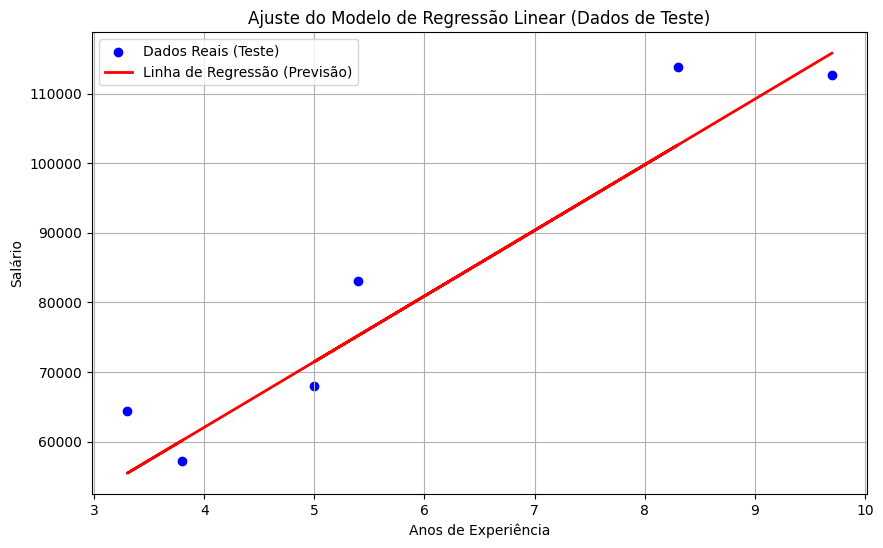

In [39]:

plt.figure(figsize=(10, 6))

# Pontos de dados reais do conjunto de teste
plt.scatter(X_test, y_test, color='blue', label='Dados Reais (Teste)')

# Linha de regressão (predições do modelo)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão (Previsão)')

plt.title('Ajuste do Modelo de Regressão Linear (Dados de Teste)')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.grid(True)
plt.show()


In [40]:

anos_de_experiencia_novo = 10

novo_valor = np.array([[anos_de_experiencia_novo]])

salario_previsto = modelo.predict(novo_valor)

print(f"Previsão de salário para {anos_de_experiencia_novo} anos de experiência: R$ {salario_previsto[0]:.2f}")


Previsão de salário para 10 anos de experiência: R$ 118618.35


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
